In [1]:
# Importing preprocessed dataset
import pandas as pd
df = pd.read_csv('cleaned_data_more_features_filtered.csv')

In [2]:
#Separating features X from labels y
y = df['calories'].to_numpy()
X = df.drop(columns=['calories']).to_numpy()

In [3]:
# Scaling the data and dividing dataset into training and testing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size = 0.2)

In [4]:
from sklearn.tree import DecisionTreeRegressor
DTR = DecisionTreeRegressor(max_depth = 5,min_samples_split=7)
DTR.fit(X_train, y_train)
DTR.score(X_test, y_test) #testing accuracy

0.9390433206263378

In [5]:
DTR.score(X_train, y_train) #training accuracy

0.9443907856857879

In [6]:
#X_test = scaler.transform(X)
y_pred = DTR.predict(X_test)
y_pred

array([382.14563008, 382.14563008, 305.56574521, ..., 142.14512455,
       142.14512455, 142.14512455])

In [7]:
print(y_test)

[367.1 321.9 378.6 ...  68.5 187.8 120.1]


In [8]:
print(X)

[[  0  13   0 ...  55  11   7]
 [ 18   0  17 ...  30   9   6]
 [ 22  32  48 ... 130   6  13]
 ...
 [  6   2   3 ...  40   7   8]
 [ 11  57  11 ...  29   9  10]
 [ 14  33   4 ...  20   5   7]]


In [9]:
import numpy as np

# Creating a sample input
sample_input = np.array([22, 32, 48, 39, 27, 5, 130, 6, 13]) #This is the same as the third sample, so we're expecting something close to 269.8 calories

# Reshaping (1, num_features)
sample_input = sample_input.reshape(1, -1)

sample_input_scaled = scaler.transform(sample_input)  # Use the same scaler from training

# Making prediction
predicted_value = DTR.predict(sample_input_scaled)

print("Predicted Calories:", predicted_value)

Predicted Calories: [305.56574521]


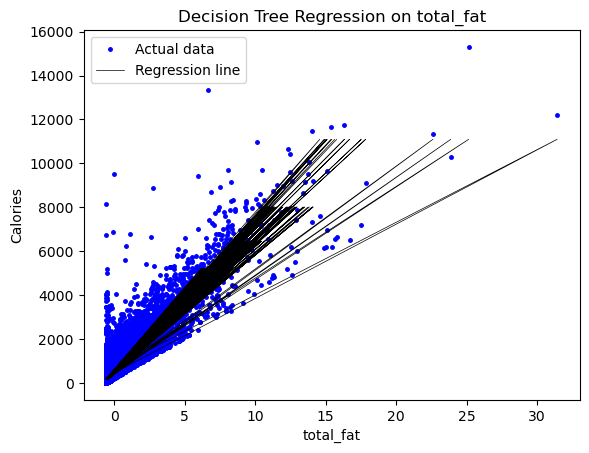

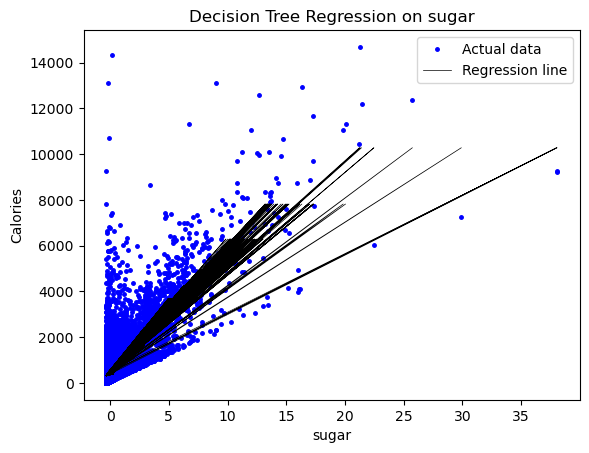

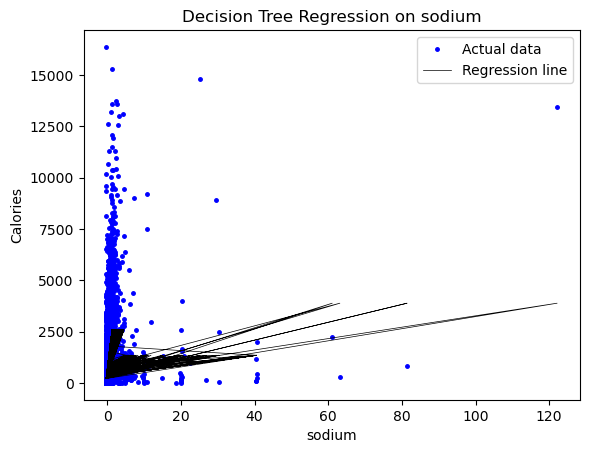

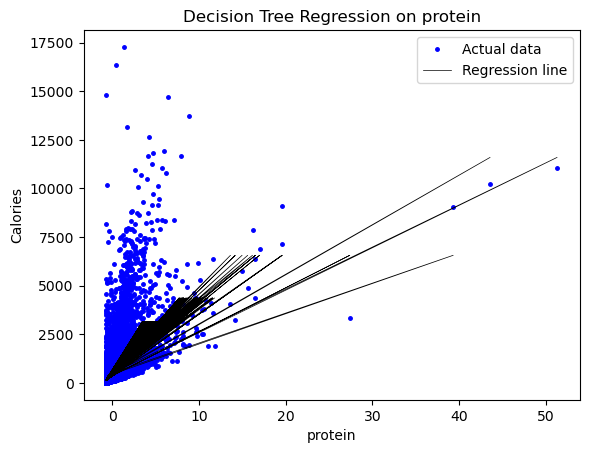

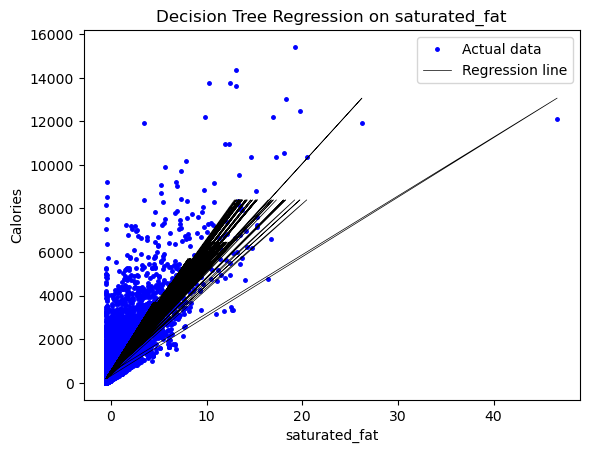

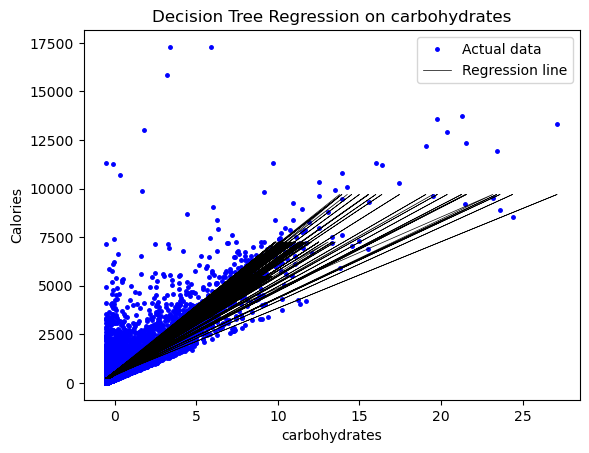

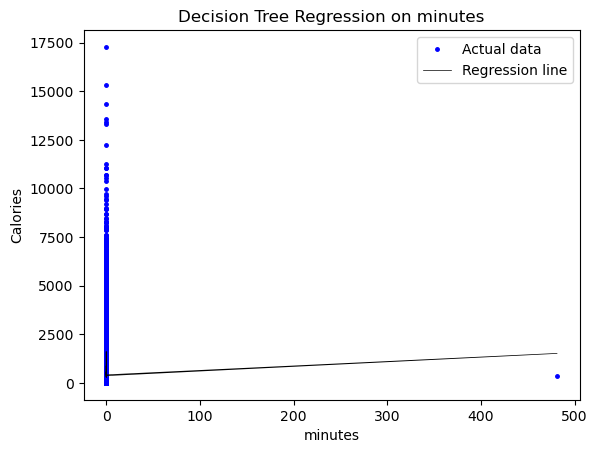

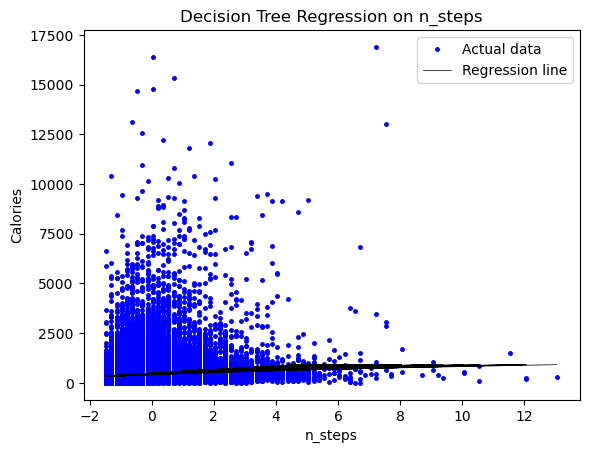

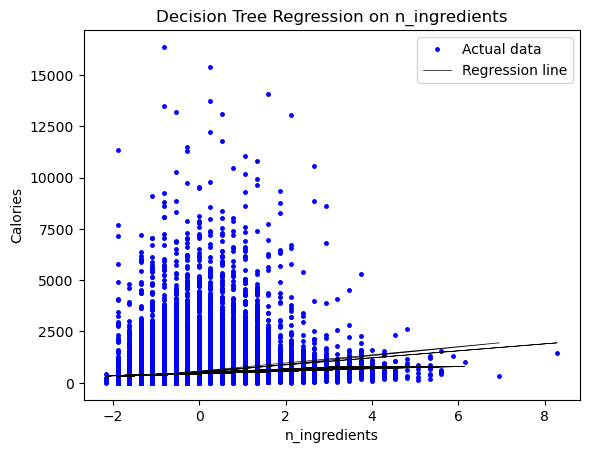

In [10]:
# Plotting linear regression between each nutrtional value and the calories
from matplotlib import pyplot as plt
for i in range(9):
    feature_index = i
    
    # Splitting using single feature
    X_single = X[:, feature_index].reshape(-1, 1)
    single_scaler = StandardScaler()
    X_single_scaled = single_scaler.fit_transform(X_single)
    X_train_single, X_test_single, y_train_single, y_test_single = train_test_split(X_single_scaled,y, test_size = 0.2)
    
    # Fitting model using only one feature
    DTR_single = DecisionTreeRegressor(max_depth = 4)
    DTR_single.fit(X_train_single, y_train_single)
    
    y_pred_single = DTR_single.predict(X_test_single)
    
    # Plotting the actual data points
    #plt.scatter(X_single, y, color='b', label="Actual data")
    plt.plot(X_test_single, y_test_single, color='b', marker=".", markersize=5, linewidth=0, label="Actual data")    
    # Plotting the regression line
    plt.plot(X_test_single, y_pred_single, color='k', linewidth=0.5, label="Regression line")

    # Getting the feature names from the data
    feature_names = df.drop(columns=['calories']).columns
    feature_name = feature_names[feature_index]
    
    plt.xlabel(feature_name)
    plt.ylabel("Calories")
    plt.legend()
    plt.title(f"Decision Tree Regression on {feature_name}")
    plt.show()

In [11]:
# Evaluation metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error,r2_score
mae = mean_absolute_error(y_test, y_pred) 
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred) 
r2 = r2_score(y_test, y_pred) 
  
print("MAE:", mae) 
print("MSE:", mse) 
print("RMSE:", rmse)
print("r2:", r2)

MAE: 97.89625268861003
MSE: 29260.024308893207
RMSE: 171.0556175894063
r2: 0.9390433206263378


In [12]:
#cross validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(DTR, X, y, cv=5) #X and y will be split into folds
(scores)

array([0.94005163, 0.94256024, 0.93754535, 0.93200581, 0.93589449])

In [13]:
from sklearn.model_selection import cross_validate #more comprehensive: gives time, can show training scores, can show results for multiple metrics
scores = cross_validate(DTR, X, y, cv=5, return_train_score= True, scoring=('r2', 'neg_root_mean_squared_error','neg_mean_absolute_error','neg_mean_squared_error')) #X and y will be split into folds
print(scores)

{'fit_time': array([0.35860562, 0.35762477, 0.37981987, 0.38034606, 0.3342042 ]), 'score_time': array([0.        , 0.01011395, 0.01031041, 0.        , 0.00202703]), 'test_r2': array([0.94005163, 0.94256024, 0.93754535, 0.93200581, 0.93589449]), 'train_r2': array([0.94470221, 0.94376291, 0.94400409, 0.94120714, 0.94605698]), 'test_neg_root_mean_squared_error': array([-167.70225047, -169.07229799, -168.65493714, -183.86063307,
       -160.50069154]), 'train_neg_root_mean_squared_error': array([-160.05377378, -160.17547027, -161.66533045, -163.78640321,
       -160.90645253]), 'test_neg_mean_absolute_error': array([-98.40029799, -97.27181904, -97.77101188, -99.20931461,
       -94.8508997 ]), 'train_neg_mean_absolute_error': array([-95.8061151 , -96.75847375, -96.33384928, -96.53421077,
       -96.81687291]), 'test_neg_mean_squared_error': array([-28124.04481355, -28585.44194883, -28444.48782014, -33804.73239302,
       -25760.471984  ]), 'train_neg_mean_squared_error': array([-25617.2105

In [14]:
scores_df = pd.DataFrame(scores)
summary_df = scores_df.mean().to_frame(name="Mean")
summary_df["Std Dev"] = scores_df.std()
print(summary_df)

                                           Mean      Std Dev
fit_time                               0.362120     0.019087
score_time                             0.004490     0.005289
test_r2                                0.937612     0.004026
train_r2                               0.943947     0.001772
test_neg_root_mean_squared_error    -169.958162     8.519019
train_neg_root_mean_squared_error   -161.317486     1.523701
test_neg_mean_absolute_error         -97.500669     1.648904
train_neg_mean_absolute_error        -96.449904     0.407714
test_neg_mean_squared_error       -28943.835792  2950.083587
train_neg_mean_squared_error      -26025.188637   493.491139


[Text(0.5, 0.9166666666666666, 'x[0] <= 2.201\nsquared_error = 460622.944\nsamples = 185288\nvalue = 467.233'),
 Text(0.25, 0.75, 'x[5] <= 1.319\nsquared_error = 134851.678\nsamples = 180726\nvalue = 392.403'),
 Text(0.375, 0.8333333333333333, 'True  '),
 Text(0.125, 0.5833333333333334, 'x[0] <= 0.09\nsquared_error = 68210.06\nsamples = 176184\nvalue = 356.918'),
 Text(0.0625, 0.4166666666666667, 'x[5] <= -0.061\nsquared_error = 25586.178\nsamples = 138277\nvalue = 260.944'),
 Text(0.03125, 0.25, 'x[0] <= -0.301\nsquared_error = 14457.337\nsamples = 103451\nvalue = 204.605'),
 Text(0.015625, 0.08333333333333333, 'squared_error = 7933.666\nsamples = 63912\nvalue = 142.145'),
 Text(0.046875, 0.08333333333333333, 'squared_error = 8503.247\nsamples = 39539\nvalue = 305.566'),
 Text(0.09375, 0.25, 'x[5] <= 0.31\nsquared_error = 21207.265\nsamples = 34826\nvalue = 428.301'),
 Text(0.078125, 0.08333333333333333, 'squared_error = 12058.798\nsamples = 26465\nvalue = 382.146'),
 Text(0.109375, 0

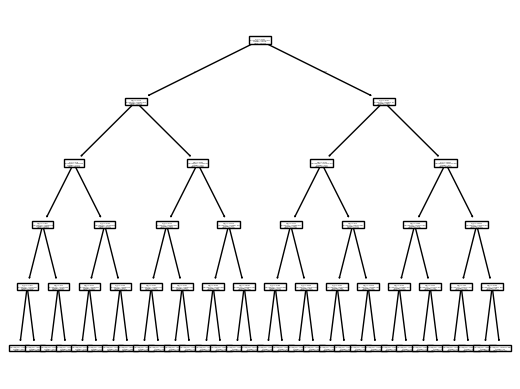

In [15]:
from sklearn import tree
tree.plot_tree(DTR)